> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset (NO show appointments)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

this dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In this section data will be loaded then it will be checked and cleaned some parts will be excludeded for my dataset analysis

### General Properties
Dataset chosen for analysis: No Show medical appointments
the dataset has 14 columns of patients information (ID, dates , genders , dieseases) I will ask questions depending on the gender age Area and health issues.

Questions:

1- Which gender show more?

2- does Medical scholralship affect the show process?

3- Does Area  affect the show process?

4-Do health problems  affect the show process?


In [5]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv('noshow.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [6]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
df.shape

(110527, 14)

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (drop unneeded columns, fix structure)

Removing some useless columns  days and IDs will not affect our results!

Data of PatientId, AppointmentID , ScheduledDay and AppointmentDay are not needed in our dataset

In [8]:
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis = 1,inplace=True)
df.head()


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110527 non-null  object
 1   Age            110527 non-null  int64 
 2   Neighbourhood  110527 non-null  object
 3   Scholarship    110527 non-null  int64 
 4   Hipertension   110527 non-null  int64 
 5   Diabetes       110527 non-null  int64 
 6   Alcoholism     110527 non-null  int64 
 7   Handcap        110527 non-null  int64 
 8   SMS_received   110527 non-null  int64 
 9   No-show        110527 non-null  object
dtypes: int64(7), object(3)
memory usage: 8.4+ MB


In [10]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.rename(columns={'Hipertension':'Hypertension'},inplace = True)
df.head(1)
df.rename(columns={'No-show':'no_show'},inplace = True)
df.head(1)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No


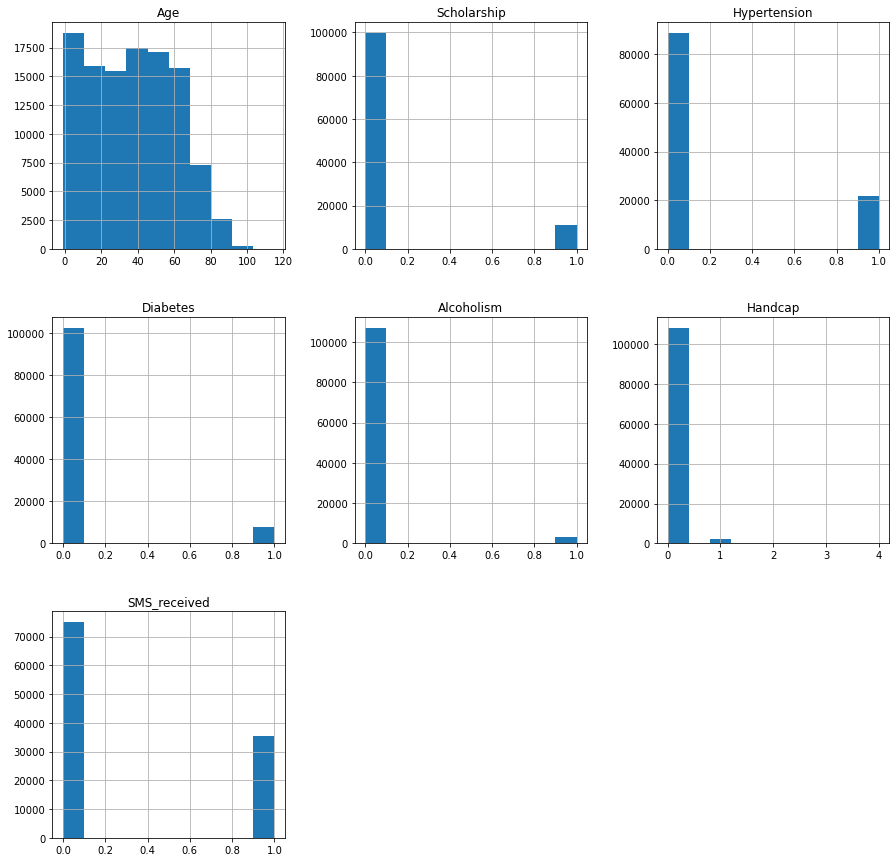

In [11]:
df.hist(figsize=(15,15));

In [12]:
show = df.no_show=='No'
noshow = df.no_show == 'Yes'

In [13]:
df[noshow].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
SMS_received     22319
no_show          22319
dtype: int64

In [14]:
df[show].count()

Gender           88208
Age              88208
Neighbourhood    88208
Scholarship      88208
Hypertension     88208
Diabetes         88208
Alcoholism       88208
Handcap          88208
SMS_received     88208
no_show          88208
dtype: int64

In [15]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (which gender show more)


### Research Question 2 (Does Scholarship affect show process)










In [23]:
def label(x,y,t):
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t);
    plt.show();
    

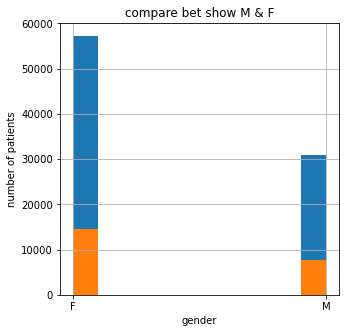

"\nplt.title('compare bet show M & F')\nplt.xlabel('gender')\nplt.ylabel('no of patients')\n"

In [41]:
plt.figure(figsize=(5,5))
df.Gender[show].hist();
df.Gender[noshow].hist();

label('gender','number of patients','compare bet show M & F');
"""
plt.title('compare bet show M & F')
plt.xlabel('gender')
plt.ylabel('no of patients')
"""

there is no correlation between gender and show no show process they have an equal rate of apperance

In [37]:
print(df.Gender[show].value_counts())
print(df.Gender[noshow].value_counts())

F    57246
M    30962
Name: Gender, dtype: int64
F    14594
M     7725
Name: Gender, dtype: int64


the rate of show is 75% in both genders so, thw show process is not affected by the gender

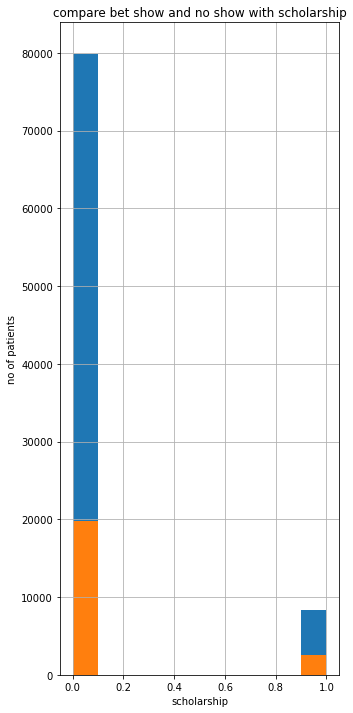

In [25]:
plt.figure(figsize=(5,12))
df.Scholarship	[show].hist();
df.Scholarship	[noshow].hist();
label('scholarship','no of patients','compare bet show and no show with scholarship')



In [39]:
print(df.Scholarship[show].value_counts())
print(df.Scholarship[noshow].value_counts())

0    79925
1     8283
Name: Scholarship, dtype: int64
0    19741
1     2578
Name: Scholarship, dtype: int64


the percentage in show process is between 87 & 89 % if the patient have o medical schoolarship or nnit so, there is no correlation between having a scholarship and appearence

### Research Question 3  (Does Area affect the show process?)

### Research Question 4  (Do health problems affect the show process?)

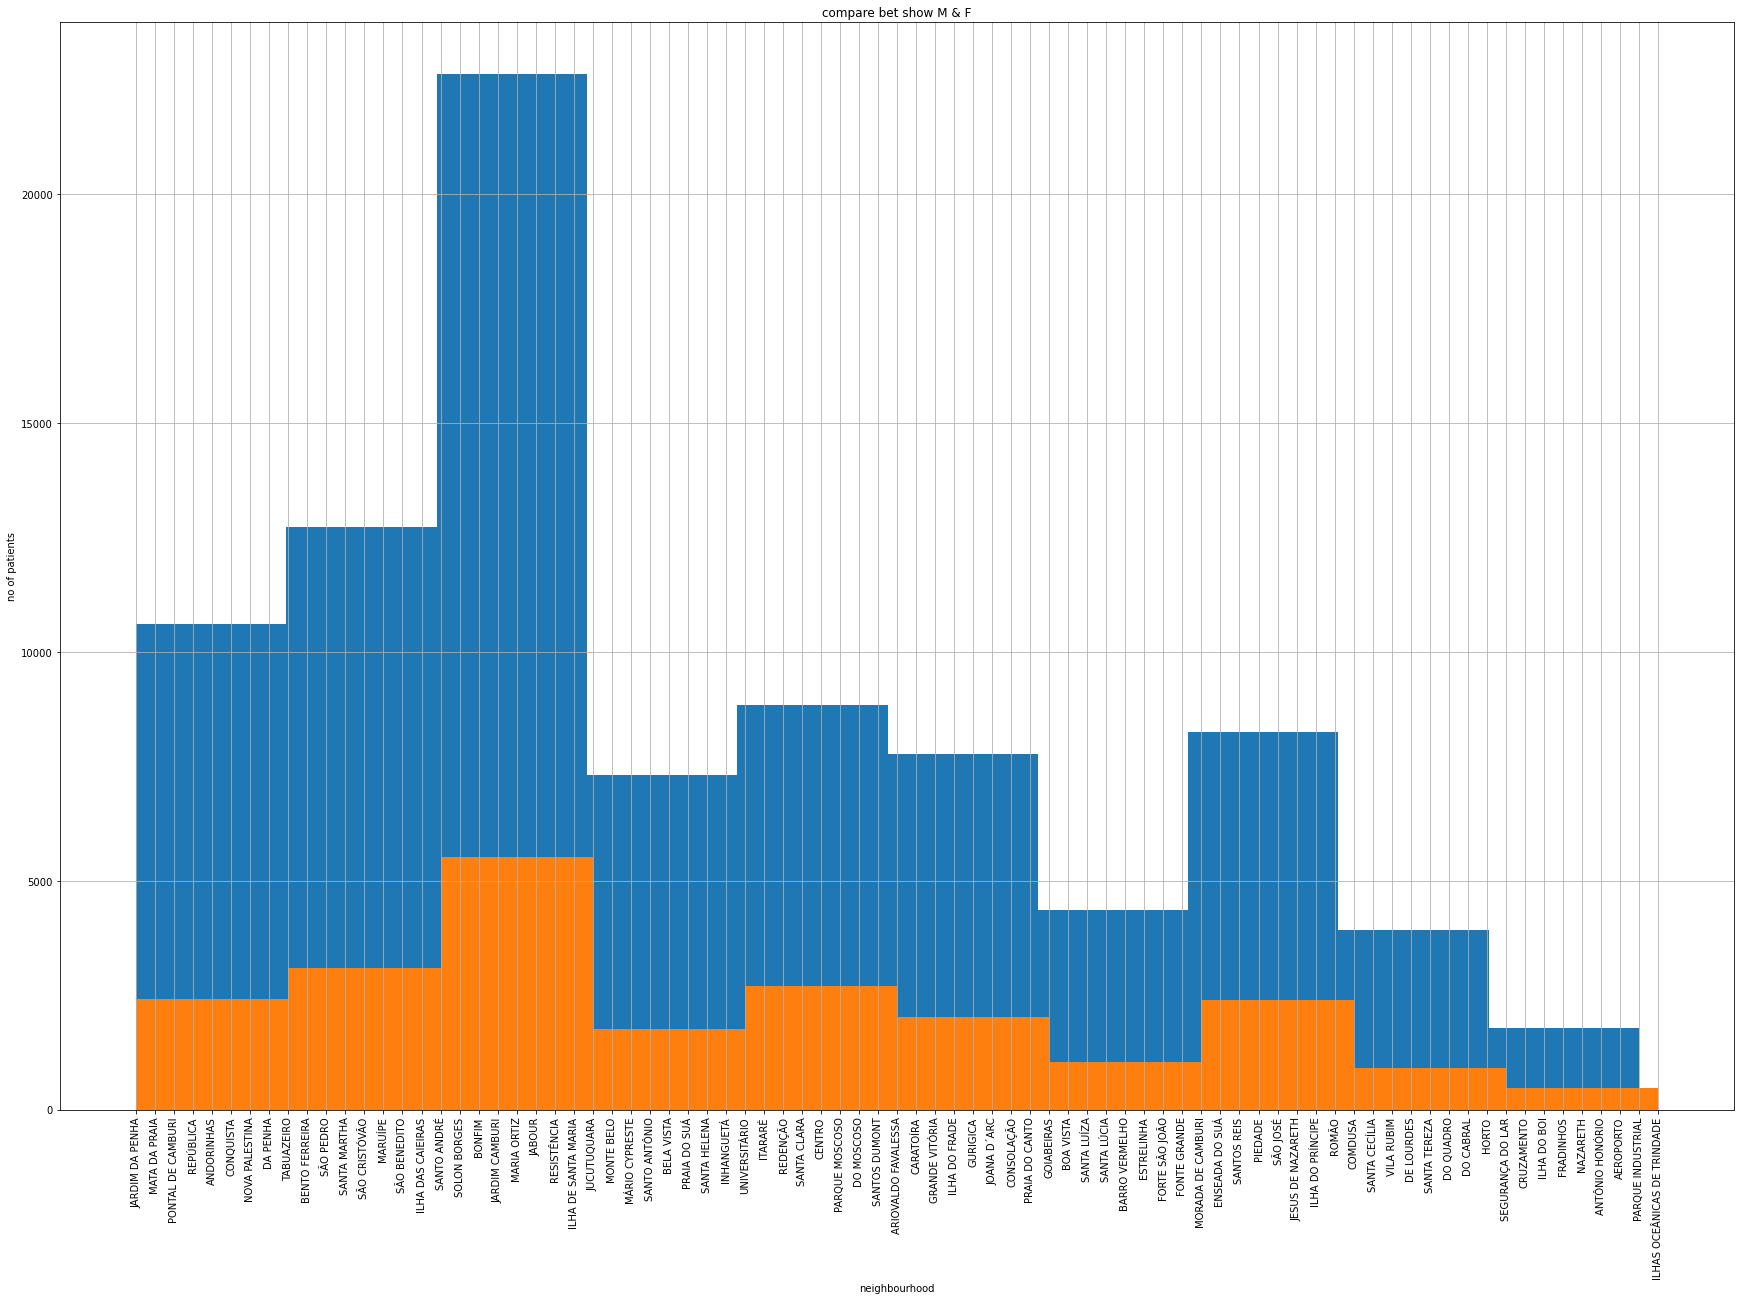

In [39]:
plt.figure(figsize=(30,20))
#plt.scatter(no_show['Neighbourhood'],no)
df.Neighbourhood[show].hist();
df.Neighbourhood[noshow].hist();
#label('Neighbourhood','no of patients','compare bet show and no show with Neighbourhood')
plt.title('compare bet show M & F')
plt.xlabel('neighbourhood')
plt.ylabel('no of patients')
plt.xticks(rotation = 90);



In [42]:
print(df.Neighbourhood[show].value_counts())
print(df.Neighbourhood[noshow].value_counts())

JARDIM CAMBURI       6252
MARIA ORTIZ          4586
RESISTÊNCIA          3525
JARDIM DA PENHA      3246
SANTA MARTHA         2635
                     ... 
PONTAL DE CAMBURI      57
ILHA DO BOI            32
ILHA DO FRADE           8
AEROPORTO               7
PARQUE INDUSTRIAL       1
Name: Neighbourhood, Length: 80, dtype: int64
JARDIM CAMBURI                 1465
MARIA ORTIZ                    1219
ITARARÉ                         923
RESISTÊNCIA                     906
CENTRO                          703
                               ... 
PONTAL DE CAMBURI                12
ILHA DO BOI                       3
ILHA DO FRADE                     2
ILHAS OCEÂNICAS DE TRINDADE       2
AEROPORTO                         1
Name: Neighbourhood, Length: 80, dtype: int64


there is a correlation between the Neighbourhood and show process some Neighbourhoods have high show rates and some have almost no show rate

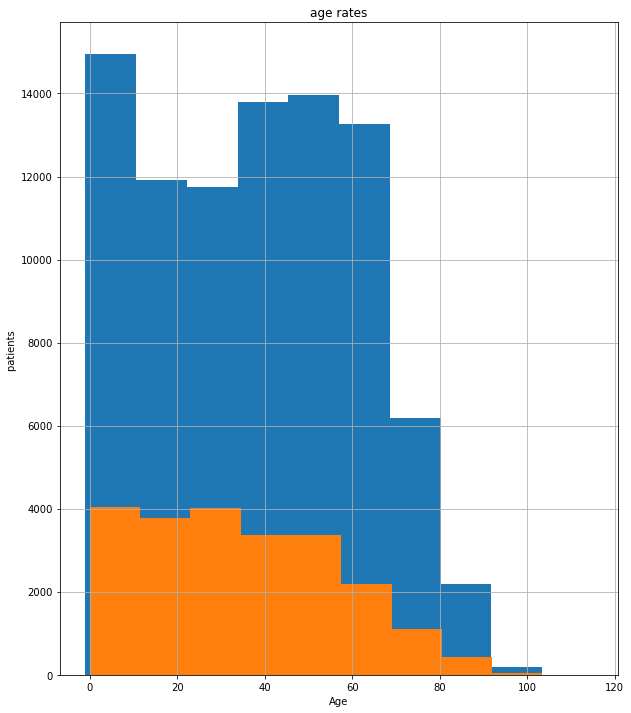

In [46]:
plt.figure(figsize=(10,12))
df.Age	[show].hist();
df.Age	[noshow].hist();
label('Age','patients ','age rates')

In [47]:
print(df.Age[show].value_counts())
print(df.Age[noshow].value_counts())

 0      2900
 1      1858
 52     1449
 56     1372
 2      1366
        ... 
 100       4
 115       2
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64
0      639
1      415
17     396
19     394
30     369
      ... 
95       6
115      3
97       2
98       1
96       1
Name: Age, Length: 100, dtype: int64


<a id='conclusions'></a>
## Conclusions

there is no significant relation between show and noshow and gender or hypertension or Scholralship 
Age may have some correlation people below 60 show while people over 60 rarely show
Show and Noshow may differ accornding to Neighbourhood

Limitations: I couldn't biuld direct relation between people showing or not and Diabites , Disabilty ,gender




In [48]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'investigate-a-dataset-template.ipynb'])

1